<a href="https://colab.research.google.com/github/ALexTommy1223/Mayhoc/blob/main/Supermarketstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Đề Tài : Supermarket store branches sales analysis**

Store ID: (Index) ID of the particular store.

Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

Daily_Customer_Count: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.

*Import Libary*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/ML'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML


In [ ]:
#code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [ ]:
df.columns 

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [75]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


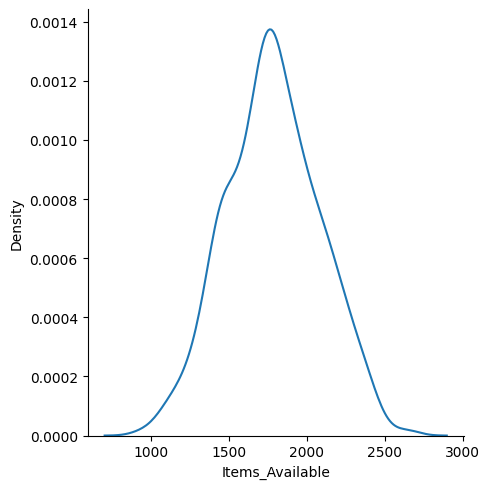

In [ ]:
sns.displot(df['Items_Available'],kind='kde')

<Axes: xlabel='Store_Area', ylabel='Items_Available'>

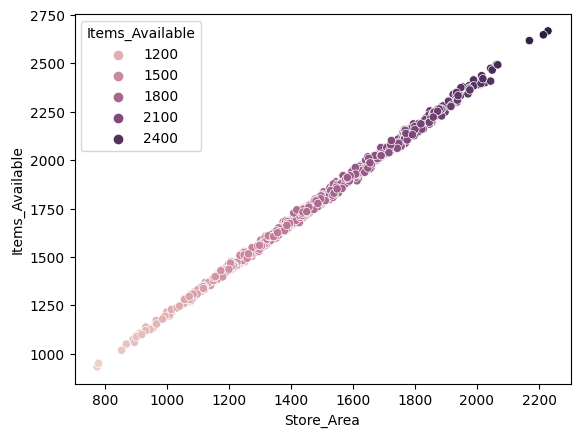

In [ ]:
sns.scatterplot(x="Store_Area",y="Items_Available",
                data=df,hue="Items_Available")

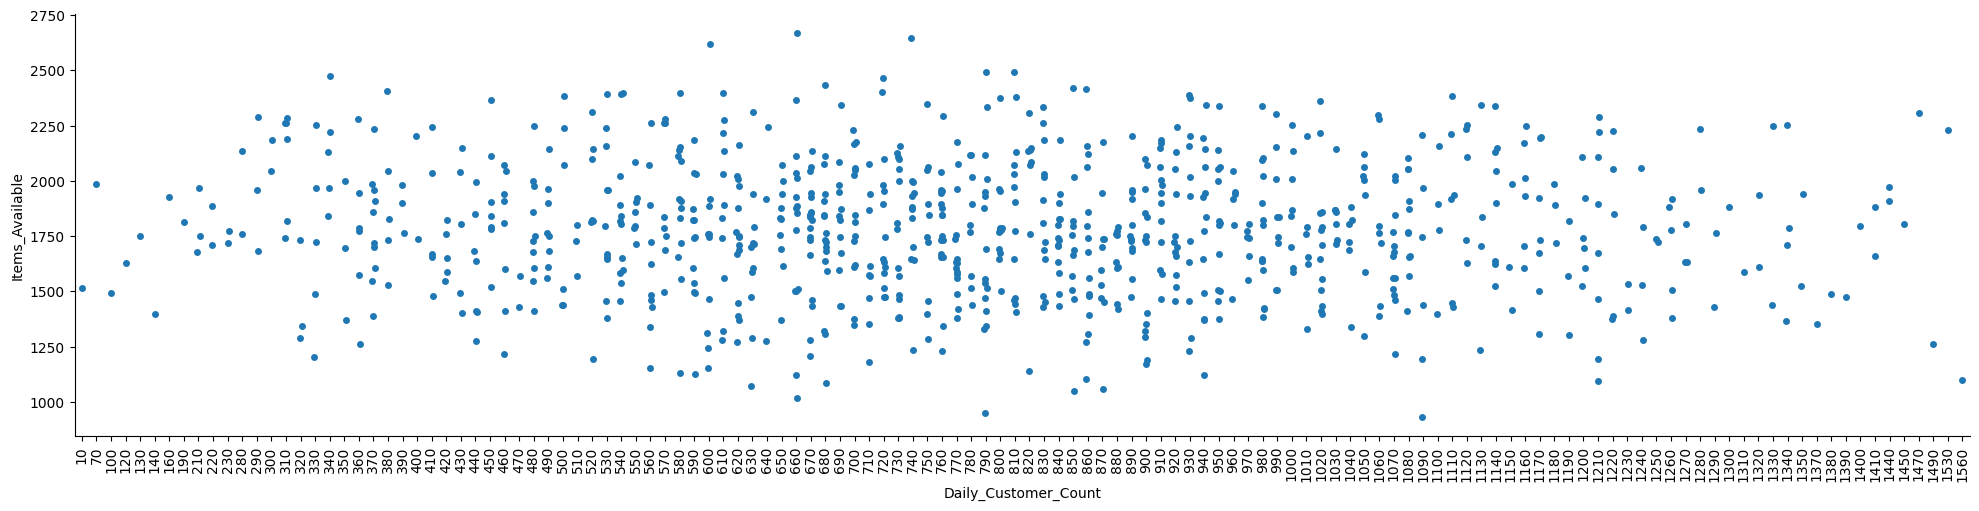

In [ ]:
df = df.sort_values(by = "Daily_Customer_Count")
sns.catplot(x = "Daily_Customer_Count",y = "Items_Available", data = df, aspect =4)
plt.xticks(rotation =90)
plt.show()

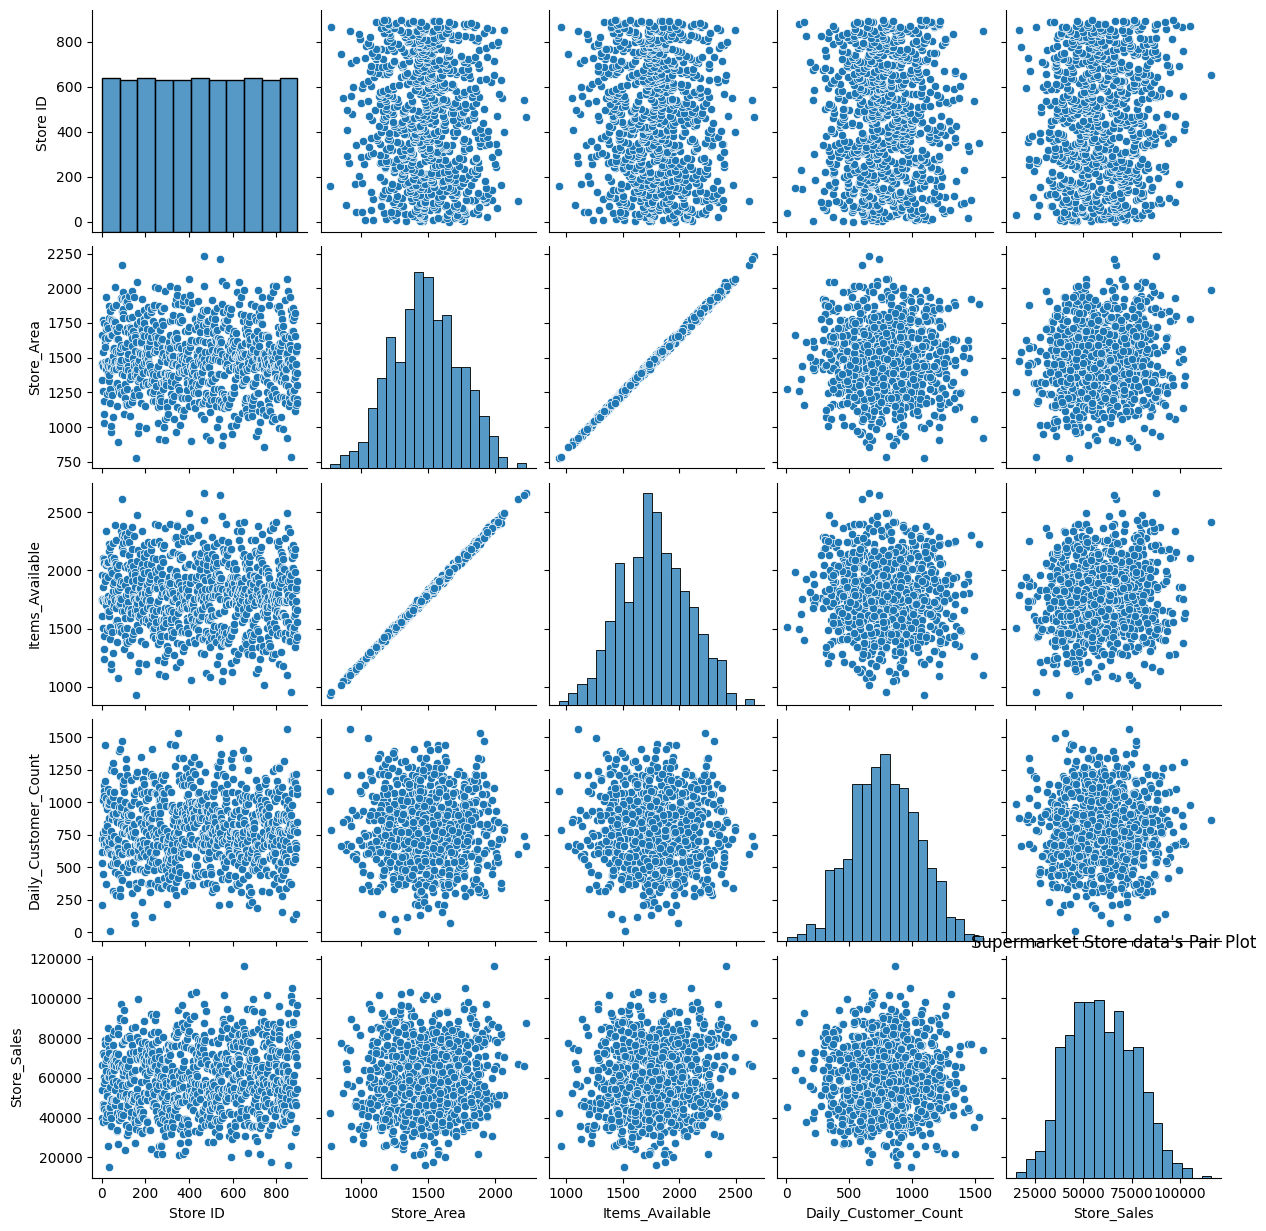

In [ ]:
sns.pairplot(df)
plt.title("Supermarket Store data's Pair Plot")
plt.show()

Text(0.5, 1.0, 'Sales correlation')

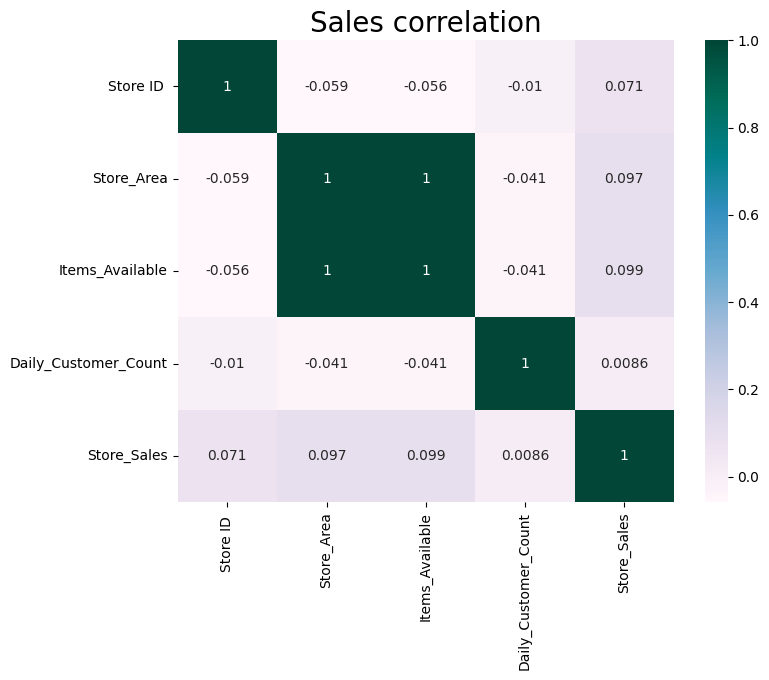

In [ ]:
plt.figure(figsize=(8,6))
hm=sns.heatmap(df.corr(),cmap="PuBuGn",annot=True)
hm.set_title('Sales correlation', fontdict={'fontsize':20})

**Thuật toán Nerual Network**

> Dự đoán Doanh số cửa hàng



In [ ]:
X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count']].values
y = df['Store_Sales'].values.reshape(-1, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile 
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)
loss = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on Test Set:", loss)


Epoch 1/25
23/23 [==============================] - 1s 2ms/step - loss: 0.0701
Epoch 2/25
23/23 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 3/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 4/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 5/25
23/23 [==============================] - 0s 3ms/step - loss: 0.0314
Epoch 6/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 7/25
23/23 [==============================] - 0s 3ms/step - loss: 0.0302
Epoch 8/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 9/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 10/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 11/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 12/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 13/25
23/23 [==============================

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = MLPClassifier()
param_grid = {
 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
 'max_iter': [50, 100, 150],
 'activation': ['tanh', 'relu'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.05],
 'learning_rate': ['constant','adaptive'],
 }

gs=GridSearchCV(estimator=clf, param_grid=param_grid,scoring='accuracy', n_jobs=-1, refit=True, return_train_score=True, cv=2)
gs.fit(X_train, y_train)
y_predict=gs.predict(X_test)
print(gs.best_params_)
print(gs.best_estimator_)
print(y_predict)
print(gs.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'sgd'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50, 30),
              learning_rate='adaptive', max_iter=150, solver='sgd')
[ 66000  66000  66000  66000  74160  50920  66000  60440  66000  66000
  66000  66000  66000  66000  66000  66000  66000  66000  66000  66000
  66000  66000  66000  66000  66000  66000  66000  66000  66000  66000
  66000  66000  66000  66000  66000  66000  66000  66000  66000  66000
  66000  66000  66000  66000  66000  66000  41800  66000  60440  66000
  66000  66000  66000  41800  60440  66000  66000  66000  66000  66000
  66000  66000  66000  66000  66000  66000  66000  66000  66000  66000
  66000  66000  66000  66000  66000  66000  66000  66000  66000  66000
  66000  66000  66000  66000  66000  66000  66000  66000  66000  66000
  66000  66000  66000  60440  66000  66000  66000  66000  66000  66000
  60440  66000 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Thuật toán SVM

Dự đoán lượng khách hằng ngày

In [61]:
# Chia thành features (đặc trưng) và label (nhãn)
X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']]
y = df['Daily_Customer_Count']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Đánh giá hiệu suất phân loại
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

          70       1.00      0.00      0.00         1
         100       0.00      1.00      0.00         0
         140       1.00      0.00      0.00         1
         210       0.00      0.00      0.00         1
         230       1.00      0.00      0.00         1
         310       0.00      0.00      0.00         1
         320       1.00      0.00      0.00         1
         330       0.00      0.00      0.00         2
         340       1.00      0.00      0.00         2
         370       0.07      1.00      0.13         1
         380       1.00      0.00      0.00         2
         390       1.00      0.00      0.00         1
         420       1.00      0.00      0.00         3
         440       1.00      0.00      0.00         1
         450       1.00      0.00      0.00         1
         460       1.00      0.00      0.00         2
         480       0.00      0.00      0.00         1
         520       1.00    

So sánh các thuật toán khác
với Dự đoán số lượng khách hàng

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [63]:
#SVM
X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']]
y = df['Daily_Customer_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='macro',zero_division=1)
svm_recall = recall_score(y_test, svm_y_pred, average='macro',zero_division=1)
svm_f1 = f1_score(y_test, svm_y_pred, average='macro',zero_division=1)

print("SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)


SVM:
Accuracy: 0.03333333333333333
Precision: 0.6154093097913322
Recall: 0.11741573033707864
F1-score: 0.010914927768860353


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred, average='macro',zero_division=1)
knn_recall = recall_score(y_test, knn_y_pred, average='macro',zero_division=1)
knn_f1 = f1_score(y_test, knn_y_pred, average='macro',zero_division=1)

print("kNN:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)

kNN:
Accuracy: 0.022222222222222223
Precision: 0.28523809523809524
Recall: 0.2571428571428571
F1-score: 0.020634920634920638


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='macro',zero_division=1)
rf_recall = recall_score(y_test, rf_y_pred, average='macro',zero_division=1)
rf_f1 = f1_score(y_test, rf_y_pred, average='macro',zero_division=1)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Random Forest:
Accuracy: 0.6166666666666667
Precision: 0.6161428571428571
Recall: 0.6401428571428572
F1-score: 0.42407070707070704


In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred, average='macro',zero_division=1)
nb_recall = recall_score(y_test, nb_y_pred, average='macro',zero_division=1)
nb_f1 = f1_score(y_test, nb_y_pred, average='macro',zero_division=1)

print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)

Naive Bayes:
Accuracy: 0.9444444444444444
Precision: 0.9294117647058824
Recall: 0.8941176470588236
F1-score: 0.8309803921568627


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='macro',zero_division=1)
dt_recall = recall_score(y_test, dt_y_pred, average='macro',zero_division=1)
dt_f1 = f1_score(y_test, dt_y_pred, average='macro',zero_division=1)

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

Decision Tree:
Accuracy: 0.9555555555555556
Precision: 0.9252873563218391
Recall: 0.9080459770114943
F1-score: 0.8352490421455938


In [72]:
from prettytable import PrettyTable

In [73]:
pt= PrettyTable(['','Accuracy','Precision','Recall','F1-score'])

svm_score=('Svm',svm_accuracy,svm_precision,svm_recall,svm_f1)
knn_score=('Knn',knn_accuracy,knn_precision,knn_recall,knn_f1)
rf_score=('Random Forest',rf_accuracy,rf_precision,rf_recall,rf_f1)
nb_score=('Naive Bayes', nb_accuracy, nb_precision, nb_recall, nb_f1)
dt_score=('Decision Tree', dt_accuracy,dt_precision,dt_recall,dt_f1)

pt.add_row(svm_score)
pt.add_row(knn_score)
pt.add_row(rf_score)
pt.add_row(nb_score)
pt.add_row(dt_score)
pt.float_format = ".4"
print(pt)

+---------------+----------+-----------+--------+----------+
|               | Accuracy | Precision | Recall | F1-score |
+---------------+----------+-----------+--------+----------+
|      Svm      |  0.0333  |   0.6154  | 0.1174 |  0.0109  |
|      Knn      |  0.0222  |   0.2852  | 0.2571 |  0.0206  |
| Random Forest |  0.6167  |   0.6161  | 0.6401 |  0.4241  |
|  Naive Bayes  |  0.9444  |   0.9294  | 0.8941 |  0.8310  |
| Decision Tree |  0.9556  |   0.9253  | 0.9080 |  0.8352  |
+---------------+----------+-----------+--------+----------+


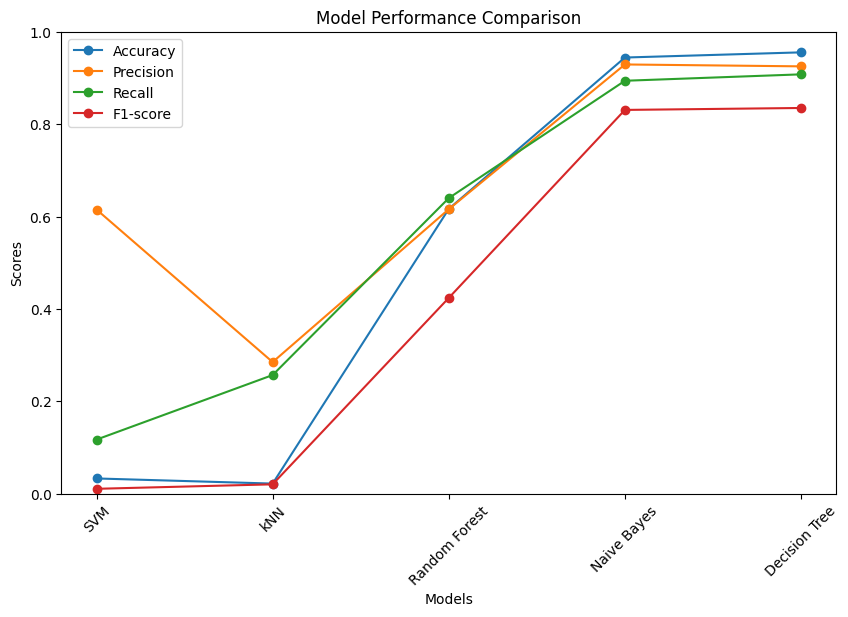

In [74]:
# Dữ liệu của các mô hình
models = ['SVM', 'kNN', 'Random Forest', 'Naive Bayes', 'Decision Tree']
accuracy = [ 0.0333, 0.0222, 0.6167, 0.9444, 0.9556]
precision = [ 0.6154, 0.2852, 0.6161, 0.9294, 0.9253]
recall = [0.1174, 0.2571, 0.6401, 0.8941, 0.9080]
f1_score = [0.0109, 0.0206, 0.4241, 0.8310,  0.8352 ]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, f1_score, marker='o', label='F1-score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()
